In [1]:
import json
import requests
import pandas as pd
import seaborn as sns
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./transfer_data.csv')
wiki = pd.read_csv('./wiki.csv')
rating = pd.read_csv('./rating.csv')

In [3]:
data.head(3)

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15


In [4]:
data1 = data.drop(['DESCRIPTION','WINDOW', 'LEAGUE', 'POSITION', 'PLAYER', 'COUNTRY', 'FROM'], axis=1)
data2 = data1.groupby(["SEASON", "TO"])[ "PRICE"].sum().sort_values(ascending=False)
data2.head(10)

SEASON  TO               
09/10   Real Madrid          261800000.0
15/16   Manchester City      215475000.0
16/17   Manchester City      200000000.0
14/15   Barcelona            184700000.0
        Manchester United    182500000.0
13/14   Real Madrid          177500000.0
16/17   Manchester United    173300000.0
10/11   Manchester City      172500000.0
13/14   Monaco               163700000.0
12/13   PSG                  155000000.0
Name: PRICE, dtype: float64

In [5]:
wiki.head(3) # Best 30

,Placement,TO,Revenue,SEASON
0,1,Manchester United,689000000.0,16/17
1,2,Barcelona,620200000.0,16/17
2,3,Real Madrid,620100000.0,16/17


In [6]:
rating.head(3) # Best 30

,Rating,Res_Rating,TO,SEASON
0,1,100,Real Madrid,16/17
1,2,99,Bayern München,16/17
2,3,98,FC Barcelona,16/17


In [48]:
result = pd.merge(data2, wiki, how='left', on=['TO', 'SEASON'])
result1 = pd.merge(result, rating, how='left', on=['TO', 'SEASON'])
result3 = result1.sort_values(by='SEASON')
result1
result2 = result1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)  # drop nan rows
result2.head()

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
0,Real Madrid,09/10,261800000.0,1.0,401400000.0,13.0,88.0
1,Manchester City,15/16,215475000.0,6.0,463500000.0,11.0,90.0
2,Manchester City,16/17,200000000.0,5.0,524900000.0,12.0,89.0
4,Manchester United,14/15,182500000.0,2.0,518000000.0,10.0,91.0
5,Real Madrid,13/14,177500000.0,1.0,518900000.0,1.0,100.0


In [45]:
result1.corr() # the less rating

,PRICE,Placement,Revenue,Rating,Res_Rating
PRICE,1.000000,-0.549776,0.609673,-0.417707,0.417707
Placement,-0.549776,1.000000,-0.837316,0.540908,-0.540908
Revenue,0.609673,-0.837316,1.000000,-0.496105,0.496105
Rating,-0.417707,0.540908,-0.496105,1.000000,-1.000000
Res_Rating,0.417707,-0.540908,0.496105,-1.000000,1.000000


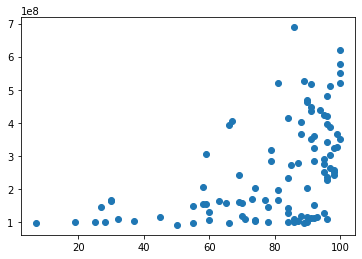

In [46]:
x = result1.Res_Rating
y = result1.Revenue
plt.scatter(x,y)

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
plot_1 = result1[result1.TO == 'Manchester United'].sort_values("SEASON")
plot_1

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
227,Manchester United,09/10,22000000.0,3.0,327000000.0,2.0,99.0
380,Manchester United,10/11,9000000.0,3.0,349800000.0,1.0,100.0
89,Manchester United,11/12,55700000.0,3.0,367000000.0,2.0,99.0
60,Manchester United,12/13,71750000.0,3.0,395900000.0,5.0,96.0
49,Manchester United,13/14,79500000.0,4.0,423800000.0,6.0,95.0
4,Manchester United,14/15,182500000.0,2.0,518000000.0,10.0,91.0
11,Manchester United,15/16,145000000.0,3.0,519500000.0,20.0,81.0
6,Manchester United,16/17,173300000.0,1.0,689000000.0,15.0,86.0


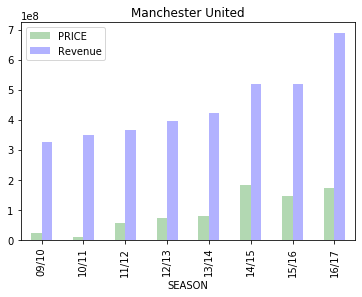

In [11]:
results_mu1 = plot_1[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_mu1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Manchester United')

In [12]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact

cf.go_offline()

plot_1.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Manchester United', color='red')

In [13]:
plot_2 = result1[result1.TO == 'Real Madrid'].sort_values("SEASON")
plot_2

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
20,Real Madrid,07/08,124200000.0,1.0,351000000.0,10.0,91.0
61,Real Madrid,08/09,70800000.0,1.0,365800000.0,13.0,88.0
0,Real Madrid,09/10,261800000.0,1.0,401400000.0,13.0,88.0
72,Real Madrid,10/11,63000000.0,1.0,438600000.0,7.0,94.0
145,Real Madrid,11/12,35500000.0,1.0,479500000.0,5.0,96.0
132,Real Madrid,12/13,38500000.0,1.0,512600000.0,4.0,97.0
5,Real Madrid,13/14,177500000.0,1.0,518900000.0,1.0,100.0
16,Real Madrid,14/15,137000000.0,1.0,549500000.0,1.0,100.0
67,Real Madrid,15/16,67500000.0,1.0,577000000.0,1.0,100.0
171,Real Madrid,16/17,30000000.0,3.0,620100000.0,1.0,100.0


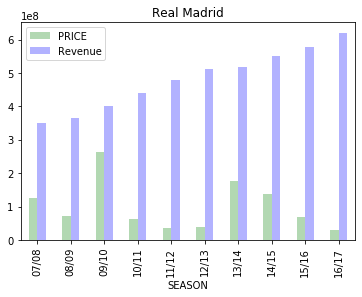

In [14]:
results_rm1 = plot_2[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_rm1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Real Madrid')

In [15]:
plot_2.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Real Madrid', color='red')

In [16]:
plot_3 = result1[result1.TO == 'Liverpool'].sort_values("SEASON")
plot_3

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
117,Liverpool,09/10,44800000.0,7.0,237000000.0,5.0,96.0
40,Liverpool,10/11,94230000.0,8.0,225300000.0,5.0,96.0
77,Liverpool,11/12,59700000.0,9.0,203300000.0,11.0,90.0
110,Liverpool,12/13,46000000.0,9.0,233200000.0,17.0,84.0
112,Liverpool,13/14,46000000.0,12.0,240600000.0,32.0,69.0
10,Liverpool,14/15,145800000.0,9.0,305900000.0,42.0,59.0
23,Liverpool,15/16,117000000.0,9.0,391800000.0,35.0,66.0
46,Liverpool,16/17,82100000.0,9.0,403800000.0,34.0,67.0


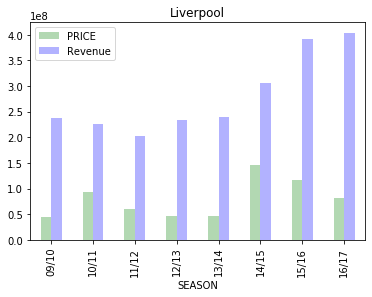

In [17]:
results_lv1 = plot_3[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_lv1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Liverpool')

In [18]:
plot_3.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Liverpool', color='red')

In [19]:
plot_4 = result2[result2.TO == 'Benfica'].sort_values("SEASON")
plot_4

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
393,Benfica,10/11,8500000.0,26.0,98200000.0,17.0,84.0
1020,Benfica,11/12,0.0,21.0,102500000.0,14.0,87.0
229,Benfica,12/13,22000000.0,24.0,111100000.0,9.0,92.0
220,Benfica,13/14,22700000.0,26.0,109200000.0,5.0,96.0
207,Benfica,14/15,24500000.0,26.0,126000000.0,6.0,95.0
250,Benfica,16/17,19700000.0,27.0,152100000.0,9.0,92.0


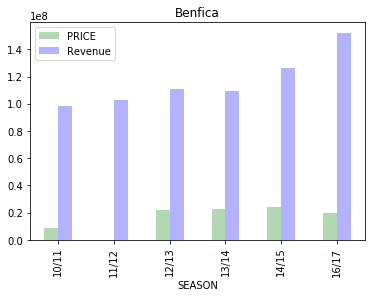

In [20]:
results_bf1 = plot_4[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_bf1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Benfica')

In [21]:
plot_4.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Benfica', color='red')

In [22]:
plot_5 = result2[result2.TO == 'Napoli'].sort_values("SEASON")
plot_5

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
717,Napoli,10/11,0.0,29.0,95100000.0,94.0,7.0
294,Napoli,11/12,14800000.0,20.0,114900000.0,56.0,45.0
353,Napoli,12/13,10500000.0,16.0,148400000.0,46.0,55.0
42,Napoli,13/14,90500000.0,22.0,116400000.0,31.0,70.0
313,Napoli,14/15,13000000.0,16.0,164800000.0,20.0,81.0
217,Napoli,15/16,23000000.0,30.0,125500000.0,17.0,84.0
55,Napoli,16/17,74500000.0,30.0,142700000.0,17.0,84.0


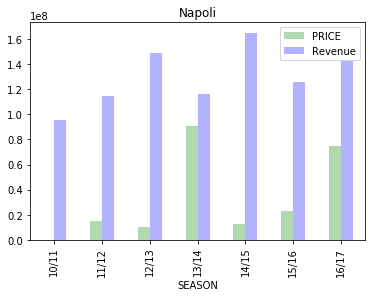

In [23]:
results_na1 = plot_5[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_na1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Napoli')

In [24]:
plot_5.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Napoli', color='red')

In [25]:
plot_6 = result2[result2.TO == 'Galatasaray'].sort_values("SEASON")
plot_6

,TO,SEASON,PRICE,Placement,Revenue,Rating,Res_Rating
169,Galatasaray,12/13,30000000.0,19.0,129700000.0,41.0,60.0
205,Galatasaray,13/14,24750000.0,16.0,157000000.0,36.0,65.0
503,Galatasaray,14/15,4750000.0,18.0,161900000.0,38.0,63.0
397,Galatasaray,15/16,8250000.0,21.0,159100000.0,32.0,69.0
1065,Galatasaray,16/17,0.0,26.0,155900000.0,31.0,70.0


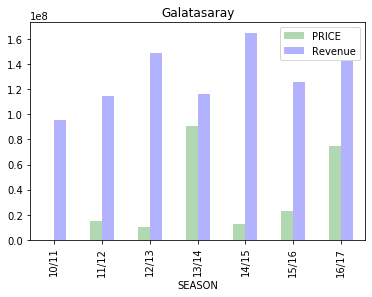

In [26]:
results_gs1 = plot_5[["PRICE", "Revenue","SEASON"]].groupby(["SEASON"]).agg("mean")
results_gs1.plot.bar(color=['g', 'b'], alpha = 0.3, title='Galatasaray')

In [27]:
plot_6.iplot(x='SEASON', y='Res_Rating', categories='TO', xTitle='Season', yTitle='Rating', title='Galatasaray', color='red')

In [28]:
data2

SEASON  TO               
09/10   Real Madrid          261800000.0
15/16   Manchester City      215475000.0
16/17   Manchester City      200000000.0
14/15   Barcelona            184700000.0
        Manchester United    182500000.0
13/14   Real Madrid          177500000.0
16/17   Manchester United    173300000.0
10/11   Manchester City      172500000.0
13/14   Monaco               163700000.0
12/13   PSG                  155000000.0
14/15   Liverpool            145800000.0
15/16   Manchester United    145000000.0
16/17   Juventus             143400000.0
        Chelsea              143000000.0
14/15   Chelsea              142300000.0
16/17   Barcelona            138000000.0
14/15   Real Madrid          137000000.0
13/14   PSG                  133900000.0
15/16   Atletico Madrid      129700000.0
        Juventus             126000000.0
07/08   Real Madrid          124200000.0
13/14   Tottenham            121600000.0
09/10   Manchester City      118500000.0
15/16   Liverpool            11

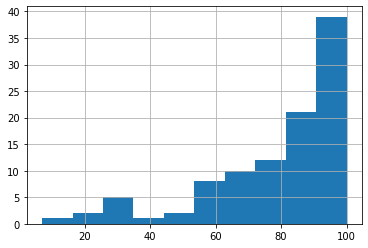

In [44]:
result2['Res_Rating'].hist()


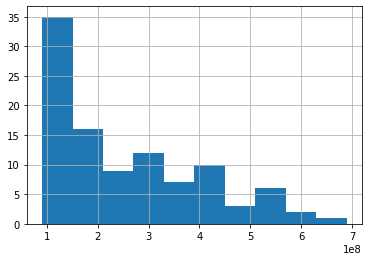

In [42]:
result2['Revenue'].hist()

[Text(0, 0, '81.0'),
 Text(0, 0, '86.0'),
 Text(0, 0, '91.0'),
 Text(0, 0, '95.0'),
 Text(0, 0, '96.0'),
 Text(0, 0, '99.0'),
 Text(0, 0, '100.0')]

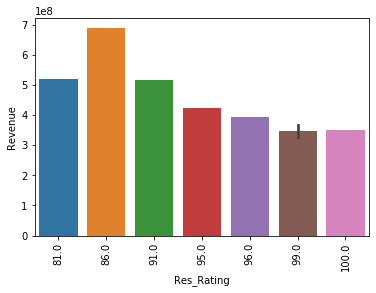

In [36]:
ax = sns.barplot(x="Res_Rating", y="Revenue", data=plot_1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

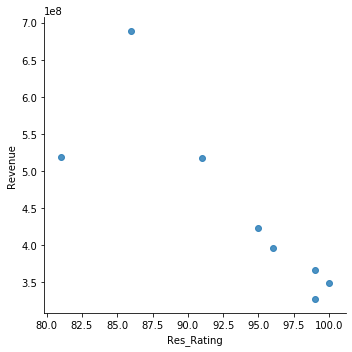

In [39]:
sns.lmplot("Res_Rating", "Revenue", data = plot_1, fit_reg=False)